In [1]:
import pandas as pd 
from io import StringIO

In [39]:
csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

In [40]:
df = pd.read_csv(StringIO(csv_data))

In [41]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [42]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [43]:
df.values

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,  nan,   8.],
       [ 10.,  11.,  12.,  nan]])

## Imputing missing values

In [44]:
## Mean imputation  
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values = 'NaN',strategy ='mean',axis=0) 
imr = imr.fit(df.values) 
imputed_data = imr.transform(df.values)

In [45]:
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [ 10. ,  11. ,  12. ,   6. ]])

### Handling categorical data 

In [46]:
import pandas as pd 
df = pd.DataFrame([['green','M',10.1,'class1'],
                  ['red','L',13.5,'class2'],
                  ['blue','XL',15.3,'class1']])
df.columns =['color','size','price','classlabel']

In [47]:
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [48]:
size_mapping = {'XL':3,'L':2,'M':1}
df['size'] =df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [49]:
inv_size_mapping = {v:k for k,v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

## Encoding class labels 

In [24]:
import numpy as np 
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [50]:
df['classlabel'] = df['classlabel'].map(class_mapping)

In [51]:
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [27]:
from sklearn.preprocessing import LabelEncoder 
class_le = LabelEncoder() 

In [32]:
y = class_le.fit_transform(df['classlabel'].values) 
y

array([0, 1, 0])

In [33]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

In [34]:
X = df[['color','size','price']].values 
color_le = LabelEncoder() 

In [35]:
X[:,0] = color_le.fit_transform(X[:,0])
X

array([[1, 'M', 10.1],
       [2, 'L', 13.5],
       [0, 'XL', 15.3]], dtype=object)

In [36]:
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [52]:
pd.get_dummies(df[['price','color','size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0.0,1.0,0.0
1,13.5,2,0.0,0.0,1.0
2,15.3,3,1.0,0.0,0.0


In [53]:
pd.get_dummies(df[['price','color','size']],drop_first =True)

,price,size,color_green,color_red
0,10.1,1,1.0,0.0
1,13.5,2,0.0,1.0
2,15.3,3,0.0,0.0


## Partitioning a dataset into separate training and test sets

In [119]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [55]:
df_wine.shape

(178, 14)

In [120]:
from sklearn.cross_validation import train_test_split
X,y = df_wine.iloc[:,1:].values ,df_wine.iloc[:,0].values  
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

### Bringing features onto the same scale

In [60]:
##Nromalization
from sklearn.preprocessing import MinMaxScaler 
mms = MinMaxScaler() 
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [61]:
## Standardization  

from sklearn.preprocessing import StandardScaler 
stdsc = StandardScaler() 
X_train_std = stdsc.fit_transform(X_train) 
X_test_std = stdsc.transform(X_test)

## L1 & L2 regularization

In [62]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(penalty='l1') 
lr.fit(X_train_std,y_train)  
print('Training Accuracy:', lr.score(X_train_std,y_train)) 
print('Test accuracy:',lr.score(X_test_std,y_test))

Training Accuracy: 1.0
Test accuracy: 0.981818181818


In [63]:
lr.intercept_

array([-1.16653528, -1.30645662, -2.33139301])

In [67]:
lr.coef_.shape

(3, 13)

### Sequential Backward Feature Selection Algorithm

In [70]:
import sys
sys.path.append('/home/krish.mahajan/Documents/PythonMachineLearning/MLbook') 
import importlib

from algorithm import sbs 
importlib.reload(sbs)

<module 'algorithm.sbs' from '/home/krish.mahajan/Documents/PythonMachineLearning/MLbook/algorithm/sbs.py'>

In [84]:
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors =5)
sbs = sbs.SBS(knn , k_features =1 )
sbs.fit(X_train_std,y_train)

In [85]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
 (0, 1, 2, 3, 4, 5, 6, 8, 9),
 (0, 1, 2, 3, 4, 5, 6, 8),
 (0, 1, 2, 3, 5, 6, 8),
 (0, 1, 2, 5, 6, 8),
 (0, 1, 5, 6, 8),
 (0, 1, 5, 6),
 (0, 1, 6),
 (0, 1),
 (0,)]

<IPython.core.display.Javascript object>


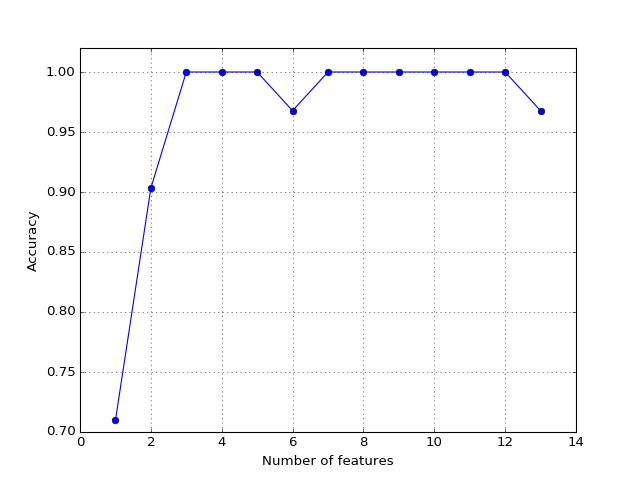

In [88]:

%matplotlib notebook
k_feat =[len(k) for k in sbs.subsets_]  
plt.plot(k_feat,sbs.scores_,marker ='o') 
plt.ylim([0.7,1.02])
plt.ylabel('Accuracy') 
plt.xlabel('Number of features') 
plt.grid()
plt.show()

In [90]:
k3 = list(sbs.subsets_[10]) 
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'Flavanoids'], dtype='object')


In [95]:
#Wihtout SBS

knn.fit(X_train_std,y_train) 
print('Training Accuracy:',knn.score(X_train_std,y_train))

print('Test Accuracy:',knn.score(X_test_std,y_test))

Training Accuracy: 0.975609756098
Test Accuracy: 0.945454545455


In [96]:
# With SBS 
knn.fit(X_train_std[:,k3],y_train) 
print('Training accuracy:',knn.score(X_train_std[:,k3],y_train))
print('Testing accuracy:',knn.score(X_test_std[:,k3],y_test))

Training accuracy: 0.934959349593
Testing accuracy: 0.963636363636


## Assessing feature importance using RandomForestClassifier

In [122]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1] 



for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Proline                        0.193821
 2) Flavanoids                     0.167757
 3) Color intensity                0.150643
 4) OD280/OD315 of diluted wines   0.128442
 5) Alcohol                        0.111738
 6) Hue                            0.061660
 7) Total phenols                  0.053334
 8) Magnesium                      0.032544
 9) Malic acid                     0.027592
10) Proanthocyanins                0.023313
11) Alcalinity of ash              0.020342
12) Nonflavanoid phenols           0.015105
13) Ash                            0.013709


<IPython.core.display.Javascript object>


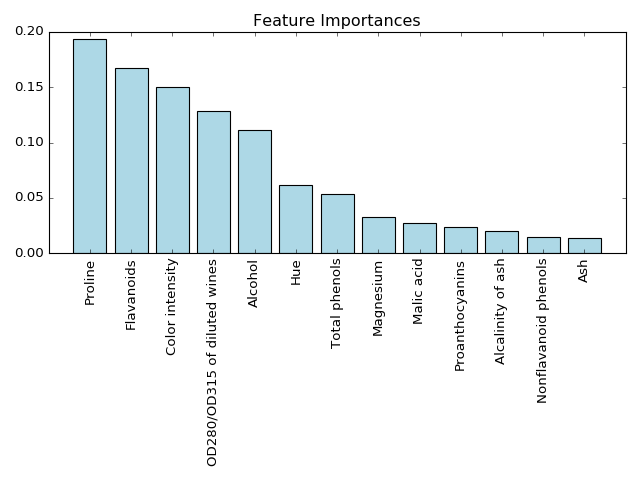

In [111]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

In [123]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected_train = sfm.transform(X_train)
print(X_selected_train.shape)
X_selected_test = sfm.transform(X_test)
print(X_selected_test.shape)

(123, 5)
(55, 5)


In [124]:
forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X_selected_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [125]:
print('Training accuracy:',forest.score(X_selected_train,y_train))
print('Testing accuracy:',forest.score(X_selected_test,y_test)) 

Training accuracy: 1.0
Testing accuracy: 0.963636363636
